In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Función de Predicción

$h(x_i) = x_i \cdot w^t $

$h(X) = XW^t$ 

In [64]:
def h(X, W):
    return np.dot(X, W)

# Loss Function Lasso

$\mathcal{L} = ||y - h(X)||_2^2 + \lambda ||W||_1$

$\mathcal{L} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=0}^{p} |w_j|$

In [67]:
def loss_lasso(X, W, Y, lamda):
    
    mse_term = np.linalg.norm(Y - h(X, W))**2 / (2 * len(Y))
    
    
    lasso_term = lamda * np.sum(np.abs(W))
    
 
    total_loss = mse_term + lasso_term
    
    return total_loss


## Derivadas Lasso

$\frac{\partial \mathcal{L}}{\partial W_{ij}} = 2 \sum_{i=1}^{n} (y_i - \hat{y}i) (-x_i) + \lambda \cdot \sum{j=0}^{p} \frac{w_j}{|w_j|} $

In [109]:
def derivates_lasso(X, W, Y, lamda):
    
    mse_term = np.matmul((np.asarray(Y) - h(X, W)).T, -np.asarray(X)) / len(Y)

   

    
 
    lasso_term = (2 * lamda / len(Y)) * np.sign(W)
    
   
    total_derivative = mse_term + lasso_term
    
    return total_derivative


# Actualización pesos

In [69]:
def update(W, alpha, dW):
    return W - alpha * dW

In [110]:
def train(X, Y, epochs, alfa, lam):
    
    W = np.random.randn(X.shape[1])*0.01
    
    
    loss_values = []
    
   
    for i in range(epochs):
       
        Y_aprox = h(X, W)
        
       
        dW = derivates_lasso(X, W, Y, lam)
        W = update(W, alfa, dW)
        
       
        L = loss_lasso(X, W, Y, lam)
        loss_values.append(L)
      
        if i % 1000 == 0:
            print("Loss value at epoch {}: {}".format(i, L))
    
    return W, loss_values


In [111]:
d_train =  pd.read_csv("train_final.csv")


In [112]:
tipos_unicos = d_train['TIPO_PROD_PROY'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_train['TIPO_PROD_PROY_NUM'] = d_train['TIPO_PROD_PROY'].map(mapeo)

print(d_train['TIPO_PROD_PROY_NUM'].unique())
print(tipos_unicos)

[1 2]
['3.PRODUCTO' '2.PROYECTO']


In [113]:
tipos_unicos = d_train['TIPO_ACT_OBRA_ACCINV'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_train['TIPO_ACT_OBRA_ACCINV_NUM'] = d_train['TIPO_ACT_OBRA_ACCINV'].map(mapeo)

print(d_train['TIPO_ACT_OBRA_ACCINV_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [114]:
tipos_unicos = d_train['CATEGORIA_GASTO'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_train['CATEGORIA_GASTO_NUM'] = d_train['CATEGORIA_GASTO'].map(mapeo)

print(d_train['CATEGORIA_GASTO_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [115]:
columnas_seleccionadas = ['TIPO_PROD_PROY_NUM', 'TIPO_ACT_OBRA_ACCINV_NUM', 'META','CANT_META_ANUAL','CANT_META_SEM','AVAN_FISICO_ANUAL',
                          'AVAN_FISICO_SEM','SEC_FUNC','CATEGORIA_GASTO_NUM','MTO_PIA']


                          

# Crear un nuevo DataFrame con las columnas seleccionadas
d_train_f = d_train[columnas_seleccionadas].copy()
d_train_f

,TIPO_PROD_PROY_NUM,TIPO_ACT_OBRA_ACCINV_NUM,META,CANT_META_ANUAL,CANT_META_SEM,AVAN_FISICO_ANUAL,AVAN_FISICO_SEM,SEC_FUNC,CATEGORIA_GASTO_NUM,MTO_PIA
0,1,1,6,0,6,0,6,9,1,0
1,1,1,20,0,6,0,6,23,1,805
2,1,1,4,0,16,0,16,41,1,0
3,1,1,1,0,6,0,6,4,1,0
4,1,1,7,0,6,0,6,10,1,8816
...,...,...,...,...,...,...,...,...,...,...
1459,1,1,21,0,0,0,0,58,1,12779
1460,1,1,17,0,0,0,0,54,1,180
1461,1,1,3,0,0,0,0,40,1,31447
1462,1,1,19,0,0,0,0,56,1,2250


In [102]:
def min_max_normalize_df(df):
    df_normalized = df.copy()  
    for col in df.columns:
        maxval = df[col].max()
        minval = df[col].min()
        if maxval != minval:
            df_normalized[col] = (df[col] - minval) / (maxval - minval)
    return df_normalized

In [103]:
def min_max_denormalize_series(series_normalized, series_original):
    maxval = series_original.max()
    minval = series_original.min()
    series_denormalized = series_normalized * (maxval - minval) + minval
    series_denormalized_rounded = series_denormalized.round().astype(int)  # Redondear y convertir a enteros
    return series_denormalized_rounded

In [116]:

d_train_n = min_max_normalize_df(d_train_f)

x_train_n = d_train_n.iloc[:, :-1]
y_train_n = d_train_n.iloc[:, -1]




In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train_n,y_train_n , random_state=104, test_size=0.30, shuffle=True)

In [132]:
alfa = 0.01
umbral = 10000  # Número de épocas
lam = 0.001



# Entrenar el modelo
W, loss_values = train(X_train, Y_train, umbral, alfa,lam)  # Asegúrate de que lamda esté definido

# Mostrar el promedio del error cuadrático medio
avg_mse = np.mean(loss_values)
print("avg_mse: ", avg_mse)

Loss value at epoch 0: 0.0027401099216163324
Loss value at epoch 1000: 0.0025499246972701377
Loss value at epoch 2000: 0.002541069385050677
Loss value at epoch 3000: 0.0025374894415207032
Loss value at epoch 4000: 0.002540014365117236
Loss value at epoch 5000: 0.0025439657620467183
Loss value at epoch 6000: 0.0025471627103290234
Loss value at epoch 7000: 0.002549688448409513
Loss value at epoch 8000: 0.0025516590698130854
Loss value at epoch 9000: 0.0025531849397901455
avg_mse:  0.0025489964794927268


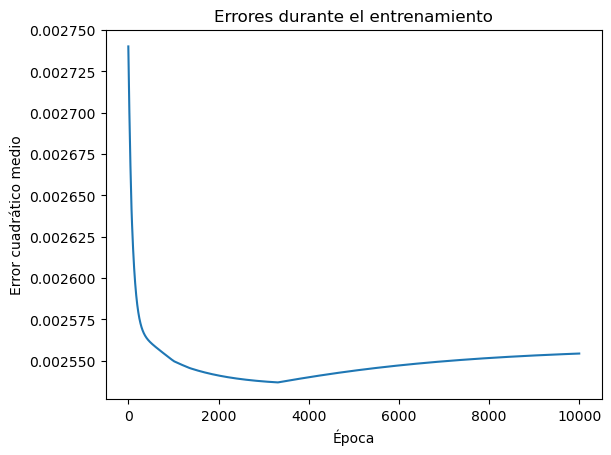

In [133]:
data = {'Época': range(len(loss_values)), 'Error cuadrático medio': loss_values}
df_loss = pd.DataFrame(data)

# Graficar los errores durante el entrenamiento con Seaborn
sns.lineplot(data=df_loss, x='Época', y='Error cuadrático medio')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.title('Errores durante el entrenamiento')
plt.show()

In [135]:
d_test =  pd.read_csv("test_final.csv")

In [136]:
tipos_unicos = d_test['TIPO_PROD_PROY'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_test['TIPO_PROD_PROY_NUM'] = d_test['TIPO_PROD_PROY'].map(mapeo)

print(d_test['TIPO_PROD_PROY_NUM'].unique())
print(tipos_unicos)

[1 2]
['3.PRODUCTO' '2.PROYECTO']


In [137]:
tipos_unicos = d_test['TIPO_ACT_OBRA_ACCINV'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_test['TIPO_ACT_OBRA_ACCINV_NUM'] = d_test['TIPO_ACT_OBRA_ACCINV'].map(mapeo)

print(d_test['TIPO_ACT_OBRA_ACCINV_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [138]:
tipos_unicos = d_test['CATEGORIA_GASTO'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
d_test['CATEGORIA_GASTO_NUM'] = d_test['CATEGORIA_GASTO'].map(mapeo)

print(d_test['CATEGORIA_GASTO_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [139]:
columnas_seleccionadas = ['TIPO_PROD_PROY_NUM', 'TIPO_ACT_OBRA_ACCINV_NUM', 'META','CANT_META_ANUAL','CANT_META_SEM','AVAN_FISICO_ANUAL',
                          'AVAN_FISICO_SEM','SEC_FUNC','CATEGORIA_GASTO_NUM']
# columnas_seleccionadas = [  'META',
#                           'AVAN_FISICO_SEM']
                          

# Crear un nuevo DataFrame con las columnas seleccionadas
d_test_f = d_test[columnas_seleccionadas].copy()
d_test_f

,TIPO_PROD_PROY_NUM,TIPO_ACT_OBRA_ACCINV_NUM,META,CANT_META_ANUAL,CANT_META_SEM,AVAN_FISICO_ANUAL,AVAN_FISICO_SEM,SEC_FUNC,CATEGORIA_GASTO_NUM
0,1,1,5,0,0,0,0,39,1
1,1,1,11,0,0,0,0,32,1
2,1,1,8,0,0,0,0,29,1
3,1,1,8,0,0,0,0,29,1
4,1,1,5,0,0,0,0,12,1
...,...,...,...,...,...,...,...,...,...
9610,1,1,1,0,0,0,0,3,1
9611,1,1,3,0,0,0,0,5,1
9612,1,1,4,0,0,0,0,36,1
9613,1,1,4,0,0,0,0,36,1


In [140]:

d_test_n = min_max_normalize_df(d_test_f)


mse = h(d_test_n, W)


df_results = pd.DataFrame({'ID': range(1, len(mse) + 1), 'MTO_PIA': mse})


mse_denormalized = min_max_denormalize_series(df_results['MTO_PIA'], d_train_f['MTO_PIA'])
mse_denormalized_int = mse_denormalized.round().astype(int)


df_final = pd.DataFrame({'ID': range(1, len(mse_denormalized_int) + 1), 'MTO_PIA': mse_denormalized_int})


df_final.to_csv('G10_Result_lasso.csv', index=False)

print(mse)

[0.00255971 0.00148264 0.00152183 ... 0.00241913 0.00241913 0.00035488]


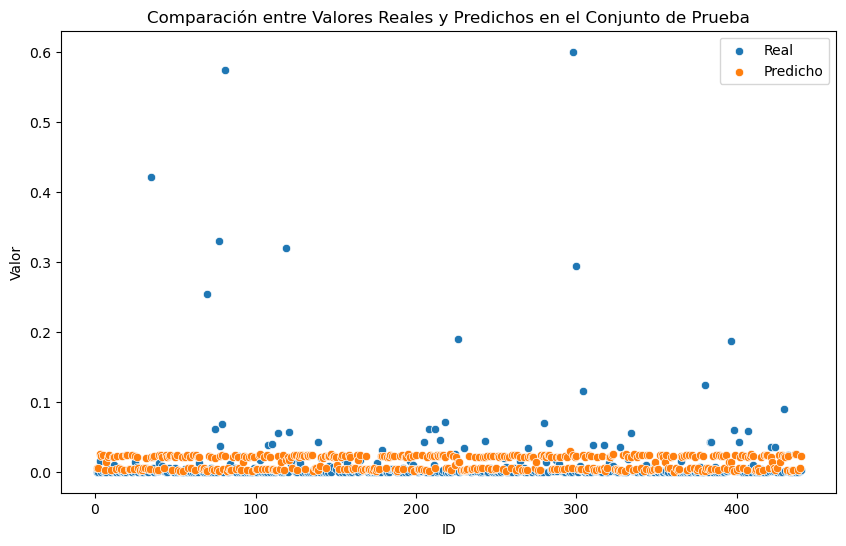

In [134]:
mse_test = h(X_test, W)
df_results_test = pd.DataFrame({'ID': range(1, len(mse_test) + 1), 'MTO_PIA': mse_test})
mse_denormalized_test = min_max_denormalize_series(df_results_test['MTO_PIA'], d_train_f['MTO_PIA'])
mse_denormalized_int_test = mse_denormalized_test.round().astype(int)
df_final_test = pd.DataFrame({'ID': range(1, len(mse_denormalized_int_test) + 1), 'MTO_PIA': mse_denormalized_int_test})

df_comparison = pd.DataFrame({'ID': range(1, len(Y_test) + 1), 'Real': Y_test.values, 'Predicho': mse_test})


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_comparison, x='ID', y='Real', label='Real')
sns.scatterplot(data=df_comparison, x='ID', y='Predicho', label='Predicho')
plt.xlabel('ID')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predichos en el Conjunto de Prueba')
plt.legend()
plt.show()